In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-airbnb-open-data/AB_US_2020.csv


# Data Understanding


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd

In [3]:
df = pd.read_csv('../input/us-airbnb-open-data/AB_US_2020.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
5,209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.61856,-82.55276,Entire home/apt,134,7,54,14/01/20,0.49,1,294,Asheville
6,213006,Blue Gate West,1098412,Susanne,NaN,28806,35.58345,-82.59713,Private room,48,1,137,30/11/19,1.35,1,0,Asheville
7,246315,Asheville Dreamer's Cabin,1292070,Annie,NaN,28805,35.59635,-82.50655,Private room,65,3,57,30/10/19,0.53,2,106,Asheville
8,259576,"Private, peaceful, and free goat therapy",1362726,Julia,NaN,28805,35.61929,-82.48114,Entire home/apt,71,28,537,05/04/20,5.01,1,207,Asheville
9,295496,The Fern Street Apt near Biltmore,1501882,Debbie,NaN,28803,35.55537,-82.53539,Entire home/apt,50,90,31,14/06/19,0.29,1,339,Asheville


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [7]:
df.isna().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

Will exclude the rows having Null values.

In [8]:
df1=df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85144 entries, 48150 to 212164
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85144 non-null  int64  
 1   name                            85144 non-null  object 
 2   host_id                         85144 non-null  int64  
 3   host_name                       85144 non-null  object 
 4   neighbourhood_group             85144 non-null  object 
 5   neighbourhood                   85144 non-null  object 
 6   latitude                        85144 non-null  float64
 7   longitude                       85144 non-null  float64
 8   room_type                       85144 non-null  object 
 9   price                           85144 non-null  int64  
 10  minimum_nights                  85144 non-null  int64  
 11  number_of_reviews               85144 non-null  int64  
 12  last_review                

In [9]:
unique_columns1= [df1[col].nunique() for col in df1]
count=pd.DataFrame({"Unique" : unique_columns1})
count['Column']=list(df1.columns)
count

,Unique,Column
0,85144,id
1,83672,name
2,54832,host_id
3,16029,host_name
4,34,neighbourhood_group
5,630,neighbourhood
6,53803,latitude
7,51595,longitude
8,4,room_type
9,1255,price


In [10]:
df1.name = df1.name.astype(str)
df1.name=df1.name.str.lower()
df1.name=df1.name.replace(['-','@','$','&','!'],'',regex=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


To replace special characters from name column

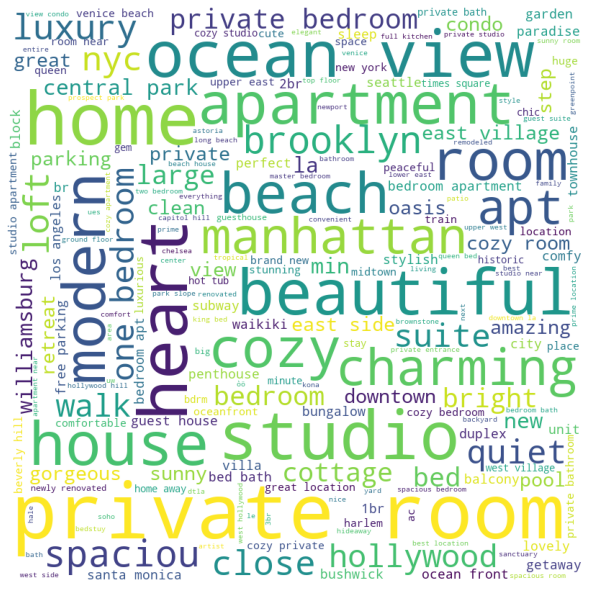

In [11]:
from wordcloud import WordCloud,STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df1.name: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()       
    comment_words += " ".join(tokens)+" "  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)                        
plt.figure(figsize = (8, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

Loading stop words to exclude them from the text in columns

In [13]:
df1["unigrams"] = df1["name"].apply(nltk.word_tokenize)
df1["unigrams"] =df1["unigrams"].apply(lambda x: [item for item in x if item not in stop_words])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:

rslt=pd.Series(np.concatenate([x for x in df1.unigrams])).value_counts()
rslt = pd.DataFrame({'ngrams': list(rslt.keys()),
                   'count': list(rslt[:])})
rslt=rslt[rslt.ngrams != '.' ]
rslt=rslt.head(20)
rslt1=rslt['ngrams'][1:20]
rslt1

1          room
2       private
3       bedroom
4     apartment
5        studio
6         beach
7          cozy
9          home
10            2
11            1
12          apt
13     spacious
14         near
15        house
16         view
17        ocean
18    beautiful
19       modern
20        condo
Name: ngrams, dtype: object

20 most frequently observed words in Name column

# Data Processing

In [15]:

def inner(text):    
    for word in text.split(' '):
        for c in rslt1:
            if word==c:
               return c
    return 'Null'       
c1=[]
for text in df1['name']:
    c1.append(inner(text))
df1['Name1']=c1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85144 entries, 48150 to 212164
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85144 non-null  int64  
 1   name                            85144 non-null  object 
 2   host_id                         85144 non-null  int64  
 3   host_name                       85144 non-null  object 
 4   neighbourhood_group             85144 non-null  object 
 5   neighbourhood                   85144 non-null  object 
 6   latitude                        85144 non-null  float64
 7   longitude                       85144 non-null  float64
 8   room_type                       85144 non-null  object 
 9   price                           85144 non-null  int64  
 10  minimum_nights                  85144 non-null  int64  
 11  number_of_reviews               85144 non-null  int64  
 12  last_review                

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


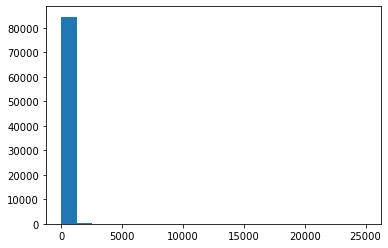

In [16]:
df2=df1[['Name1','neighbourhood_group','room_type',
        'city','price']]

plt.hist(df2['price'], bins =20)
plt.show()

considering those cases with price less than $ 1000

In [17]:
df2=df2[(df2['price']<1000)  ]

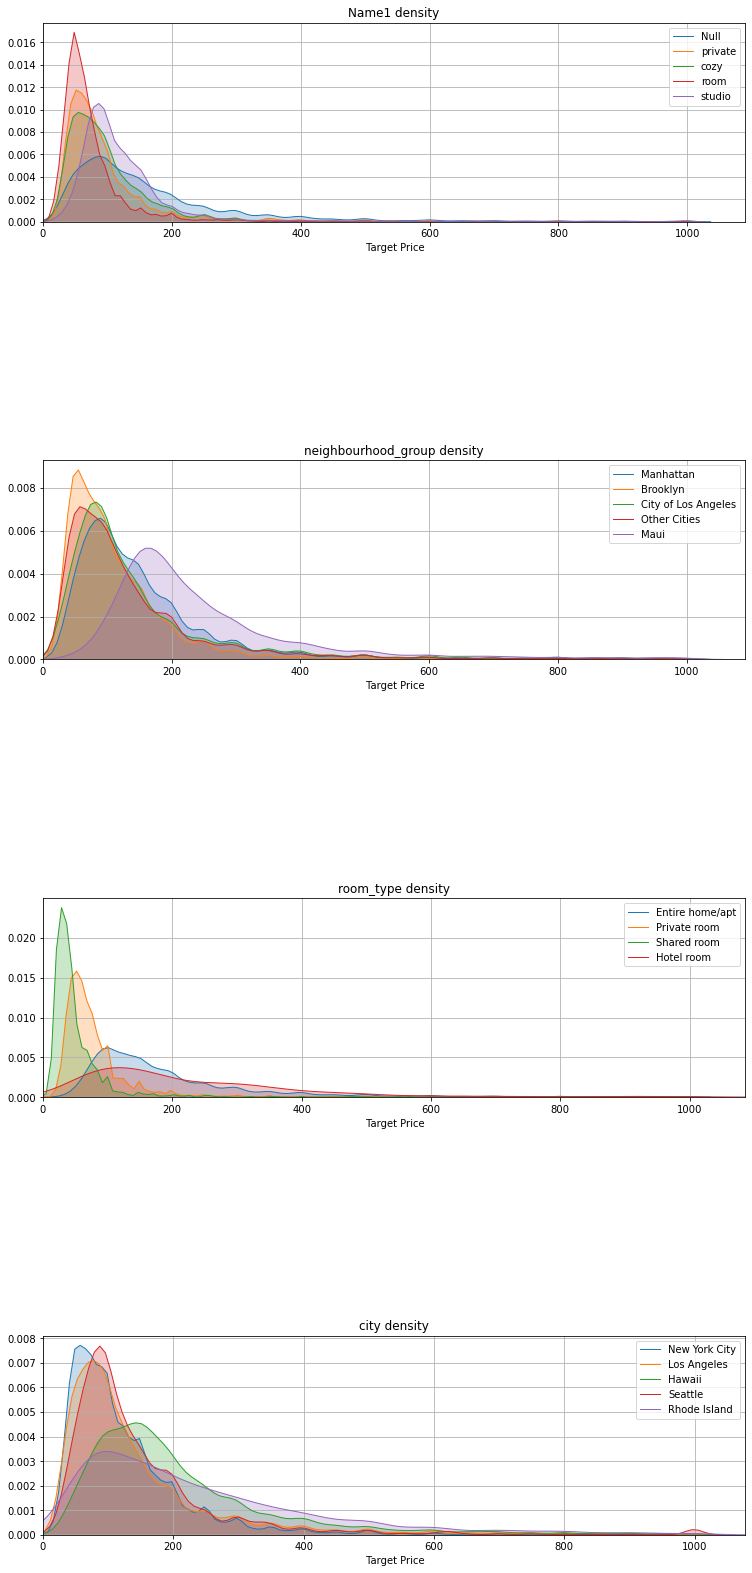

In [18]:

names = list(df2.columns)
fig, axs = plt.subplots(4, 1,figsize=(15,15))
plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1.5,
                        wspace = 0.2, hspace = 1.2)

for column_name in names[:-1]: 
    ax = axs[names.index(column_name)]
    cd= df2[column_name].value_counts()[:5]
    cd1= pd.DataFrame({'label': list(cd.keys()),
                   'count': list(cd[:])})
    s=cd1['label']
    
    for s1 in s:
        # Subset to the airline
        subset = df2[df2[column_name] == s1]
        
        # Draw the density plot
        sns.distplot(subset['price'], hist = False, kde = True,
                     kde_kws = {'shade': True,'linewidth': 1},ax=ax,
                     label = s1).set(xlim=(0))
        ax.set_xlabel( ' Target Price')
        ax.set_title(column_name + ' density')
        ax.grid('on')

Density distribution for top 5 frequencies of Name1, neighbourhood group,room type and city against Price.

In [19]:
df_group = df2.groupby('Name1').mean()  
df_group.sort_values(by=['price'], ascending=False) 


,price
Name1,
ocean,252.629065
beach,230.363024
home,209.391868
2,204.980181
condo,199.343675
view,191.178791
house,190.224818
modern,178.703301
Null,166.966696


Comparison of distribution of price for top two mean price vs bottom two mean price based on text (name)

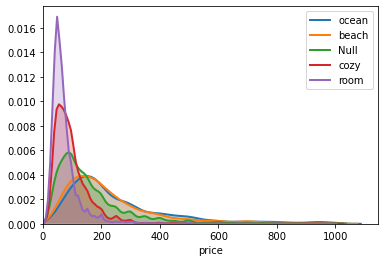

In [20]:
names = ['Name1','price']


for column_name in names[:-1]: 
    cd=['ocean','beach','Null','cozy','room']
    cd1= pd.DataFrame(cd,columns=['label'])
    s=cd1['label']
    
    for s1 in s:
        # Subset to the airline
        subset = df2[df2[column_name] == s1]
        
        # Draw the density plot
        ax=sns.distplot(subset['price'], hist = False, kde=True,
                     kde_kws = {'shade': True,'linewidth': 2},
                     label = s1).set(xlim=(0))

In [21]:
x1=[]
for c in df1.last_review:
    x1.append([c[:2],c[3:5],c[6:8]])
dt = pd.DataFrame(x1, columns=['day', 'month', 'year'],index=df1.index)
dt[['day', 'month', 'year']] = dt[['day', 'month', 'year']].astype(int)
dt.year=dt.year+2000

import datetime

dt['rev']= pd.to_datetime(dt.year*10000+dt.month*100+dt.day,format='%Y%m%d')
dt['rev']= dt['rev'].dt.date
dt['now']=datetime.date.today()
dt['dif']=dt.now-dt.rev
df1['days']=dt['dif']
df1['days']=(df1['days']/np.timedelta64(1, 'D')).astype(np.int64)

df1=df1[(df1['price']<1000)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84238 entries, 48150 to 212164
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              84238 non-null  int64  
 1   name                            84238 non-null  object 
 2   host_id                         84238 non-null  int64  
 3   host_name                       84238 non-null  object 
 4   neighbourhood_group             84238 non-null  object 
 5   neighbourhood                   84238 non-null  object 
 6   latitude                        84238 non-null  float64
 7   longitude                       84238 non-null  float64
 8   room_type                       84238 non-null  object 
 9   price                           84238 non-null  int64  
 10  minimum_nights                  84238 non-null  int64  
 11  number_of_reviews               84238 non-null  int64  
 12  last_review                

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Number of days since last review. For cases where 

                                   price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.028696          -0.090336   
minimum_nights                 -0.028696        1.000000          -0.043738   
number_of_reviews              -0.090336       -0.043738           1.000000   
reviews_per_month              -0.098240       -0.077985           0.745823   
calculated_host_listings_count  0.131238       -0.009204          -0.120957   
availability_365                0.125489        0.042365           0.119010   
days                           -0.030602        0.056216          -0.271169   

                                reviews_per_month  \
price                                   -0.098240   
minimum_nights                          -0.077985   
number_of_reviews                        0.745823   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.129666   
availability_365                         0.101626

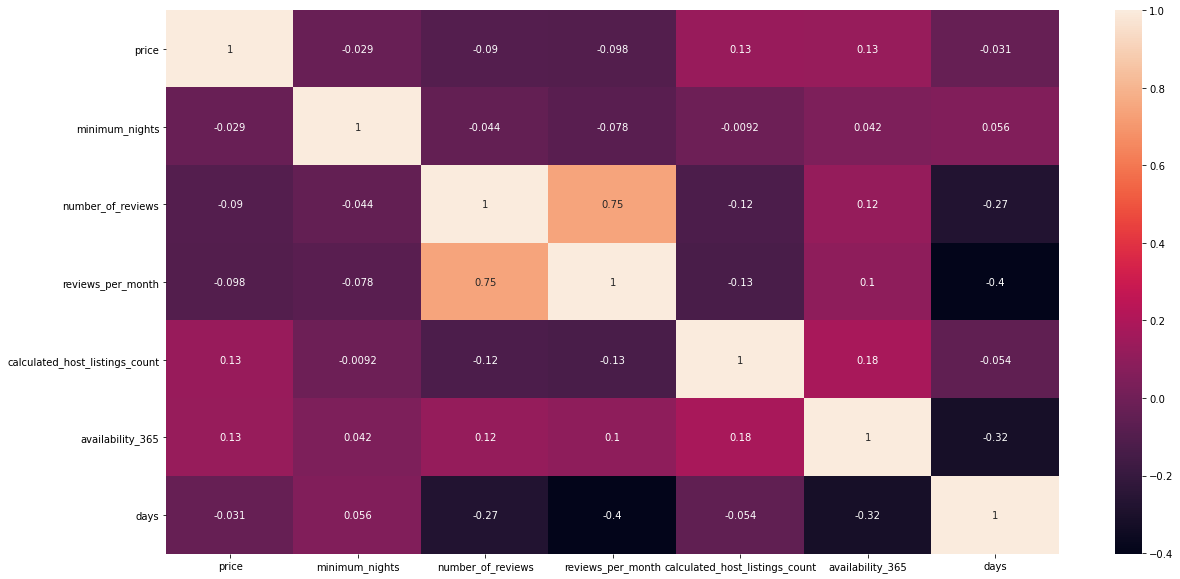

In [22]:
df1 = df1.drop([  'id','host_id','latitude','longitude','last_review'], axis = 1)
corr = df1.corr()
print(corr)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

In [23]:
dummy = pd.get_dummies(df1[['neighbourhood_group','room_type',
        'city','Name1']])

df11 = pd.concat([df1, dummy], axis = 1)
x = df11.drop(['Name1','neighbourhood_group','room_type',
        'city','price','name','host_name','neighbourhood','unigrams'], axis = 1)
x= (x-np.min(x)) / (np.max(x)-np.min(x))
y = df11['price']
y= (y-np.min(y)) / (np.max(y)-np.min(y))
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84238 entries, 48150 to 212164
Data columns (total 69 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   minimum_nights                            84238 non-null  float64
 1   number_of_reviews                         84238 non-null  float64
 2   reviews_per_month                         84238 non-null  float64
 3   calculated_host_listings_count            84238 non-null  float64
 4   availability_365                          84238 non-null  float64
 5   days                                      84238 non-null  float64
 6   neighbourhood_group_Ballard               84238 non-null  float64
 7   neighbourhood_group_Beacon Hill           84238 non-null  float64
 8   neighbourhood_group_Bristol               84238 non-null  float64
 9   neighbourhood_group_Bronx                 84238 non-null  float64
 10  neighbourhood_group_Brooklyn 

# Linear Regression

In [24]:
                   
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 21)


In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)
y1=reg.predict(x_test)


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y1)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y1)
print("R2:", r2)

MSE: 0.013530797664829482
RMSE: 0.11632195693345897
R2: 0.2603482503053338


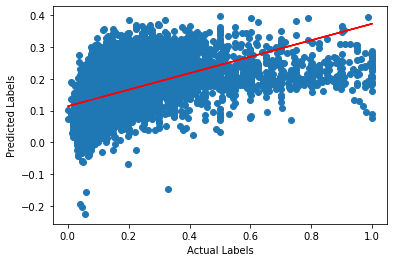

In [27]:
plt.scatter(y_test, y1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, y1, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()


# Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
model=regressor.fit(x, y)  
y1 = model.predict(x_test)

In [29]:
mse = mean_squared_error(y_test, y1)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y1)
print("R2:", r2)

MSE: 0.0016096623099130707
RMSE: 0.040120597078222436
R2: 0.9120089167367085


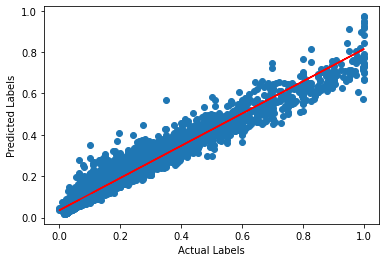

In [30]:
plt.scatter(y_test, y1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, y1, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()


In [31]:
n_nodes = []
max_depths = []
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


Average number of nodes 101204
Average maximum depth 57
